# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# # Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1.1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | chibougamau
Processing Record 5 of Set 1 | veinticinco de mayo
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | namsos
Processing Record 8 of Set 1 | 'ibri
City not found. Skipping...
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | terrace
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | saipan
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | coyhaique
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | lebu
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,19.32,88,75,10.28,PT,1736874146
1,puerto natales,-51.7236,-72.4875,15.25,41,75,11.83,CL,1736874147
2,olonkinbyen,70.9221,-8.7187,-1.08,98,100,7.45,SJ,1736874149
3,chibougamau,49.9168,-74.3659,-14.21,85,100,4.12,CA,1736874150
4,veinticinco de mayo,-35.4323,-60.1727,37.61,13,3,4.51,AR,1736874152


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,88,75,10.28,PT,1736874146
1,puerto natales,-51.7236,-72.4875,15.25,41,75,11.83,CL,1736874147
2,olonkinbyen,70.9221,-8.7187,-1.08,98,100,7.45,SJ,1736874149
3,chibougamau,49.9168,-74.3659,-14.21,85,100,4.12,CA,1736874150
4,veinticinco de mayo,-35.4323,-60.1727,37.61,13,3,4.51,AR,1736874152


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

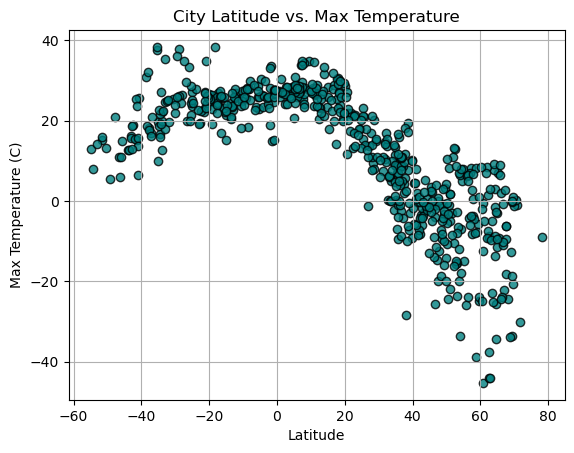

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y, edgecolors="black", c="teal", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

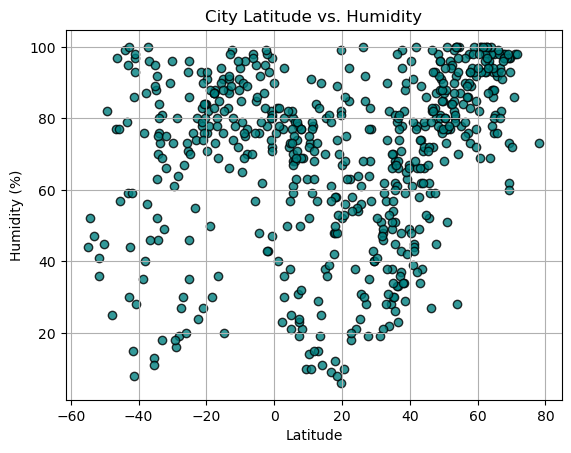

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y, edgecolors="black", c="teal", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

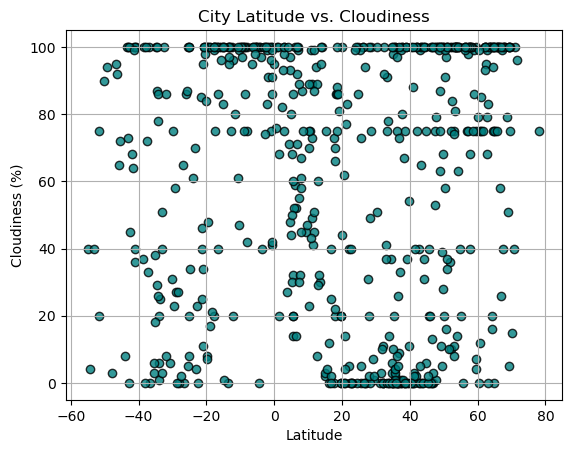

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors="black", c="teal", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

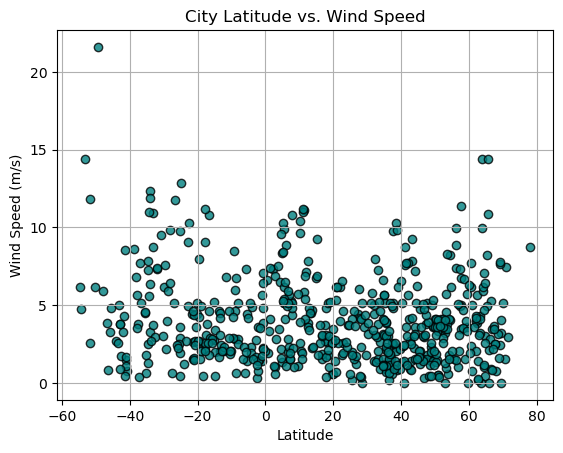

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors="black", c="teal", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# # Define a function to create Linear Regression plots
def linear_regression_plot(x, y, title, text_coordinates):
    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    regress_val = slope * x + intercept  # Regression line values
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Linear equation string

    # Plot data and regression line
    plt.scatter(x, y, edgecolors="black", alpha=0.8)
    plt.plot(x, regress_val, "r-", label="Regression Line")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs. {title}")
    plt.legend()
    plt.grid(True)

    # Print R-squared value
    print(f"The r^2 value is: {r**2}")
    plt.show()



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.32,88,75,10.28,PT,1736874146
2,olonkinbyen,70.9221,-8.7187,-1.08,98,100,7.45,SJ,1736874149
3,chibougamau,49.9168,-74.3659,-14.21,85,100,4.12,CA,1736874150
5,college,64.8569,-147.8028,-11.44,98,100,0.42,US,1736874153
6,namsos,64.4662,11.4957,2.95,93,75,1.03,NO,1736874154


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,15.25,41,75,11.83,CL,1736874147
4,veinticinco de mayo,-35.4323,-60.1727,37.61,13,3,4.51,AR,1736874152
7,adamstown,-25.0660,-130.1015,23.52,86,100,9.75,PN,1736874157
8,grytviken,-54.2811,-36.5092,7.95,52,4,4.78,GS,1736874084
12,port mathurin,-19.6833,63.4167,26.39,76,8,7.98,MU,1736874164


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.6913093361879203


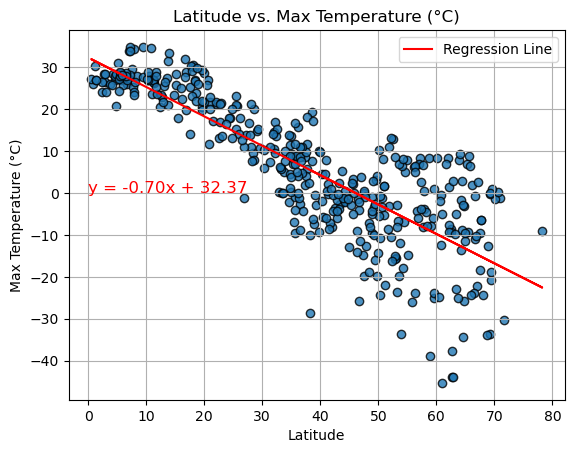

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    title="Max Temperature (°C)",
    text_coordinates=(0, 0) )

The r^2 value is: 0.25574070014320904


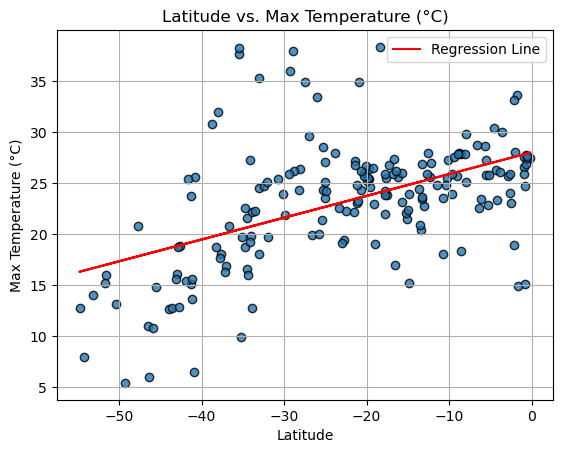

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    title="Max Temperature (°C)",
    text_coordinates=(0, 0) )

**Discussion about the linear relationship:** The regression line in the northern hemisphere shows a negative correlation between latitude and max temperature. The r^2 value of 69% shows us that 69% of the varying temperature can be explained by latitude. The southern hemisphere plot shows a rising regression line, indicating a positive correlation. As latitude reaches closer to 0 degrees, temperatures rise. However, the r^2 value of 0.25 indicates a weaker relationship between latitude and max temperature in this plot.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.26297469322402434


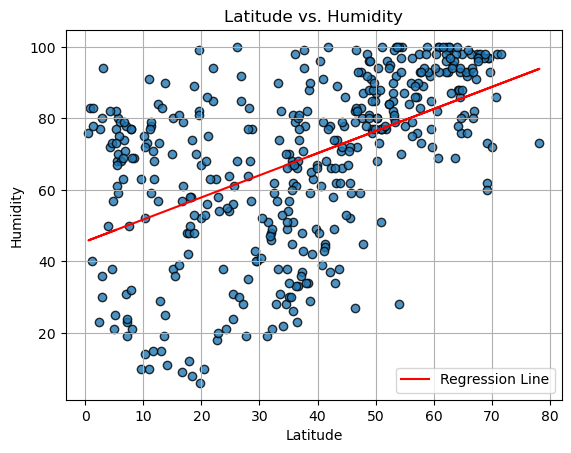

In [17]:
# Northern Hemisphere
linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    title="Humidity",
    text_coordinates=(0, 0) )

The r^2 value is: 0.10364118855128694


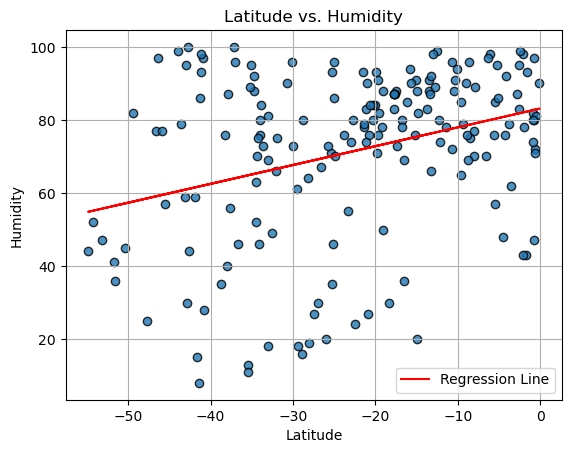

In [18]:
# Southern Hemisphere
linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    title="Humidity",
    text_coordinates=(0, 0) )

**Discussion about the linear relationship:** Analyzing the relationship between latitude and Humidity, we see that both plots have a week correlation regarding the relationship between humidity and latitude. We can see this by the r^2 value, which is considerably low in both plots. Despite this, we do still see a positive correlation on both plots, showing that as latitude increases, humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.03077798613426549


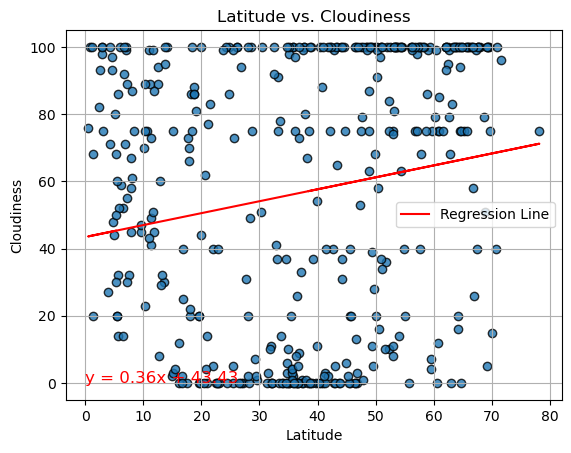

In [19]:
# Northern Hemisphere
linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    title="Cloudiness",
    text_coordinates=(0, 0) )

The r^2 value is: 0.1227767237937313


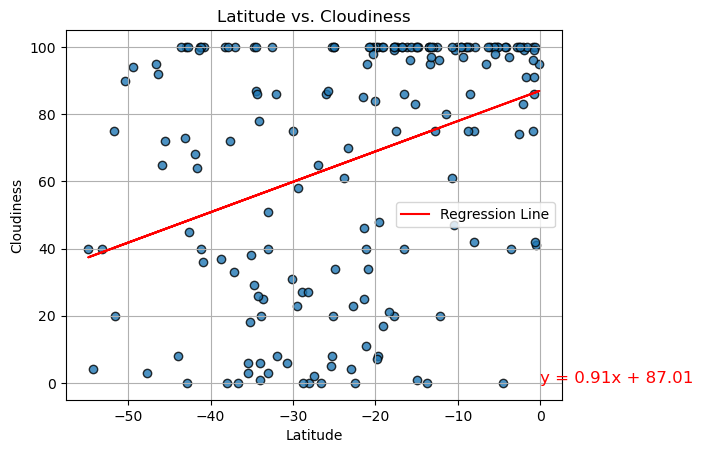

In [20]:
# Southern Hemisphere
linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    title="Cloudiness",
    text_coordinates=(0, 0) )

**Discussion about the linear relationship:** In this data set, the regression does not really provide us with any valuable information regarding these plots. However, that does tell us that there does not seem to be any real relationship between cloudiness and latitude. The r^2 values are also so low, that we would be inclined to say that indeed there is no significant relationship between the 2.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.005576859850423014


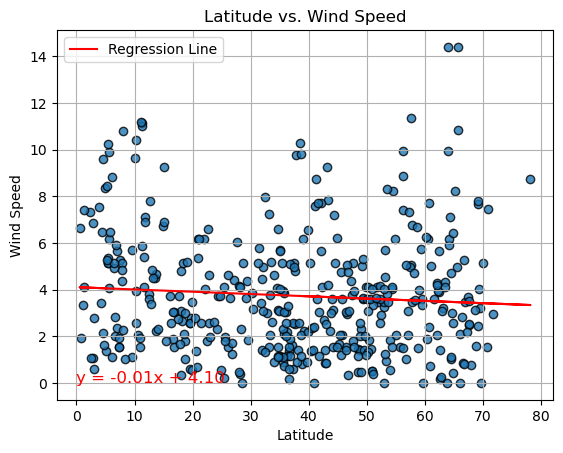

In [21]:
# Northern Hemisphere
linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    title="Wind Speed",
    text_coordinates=(0, 0) )

The r^2 value is: 0.08094007917745602


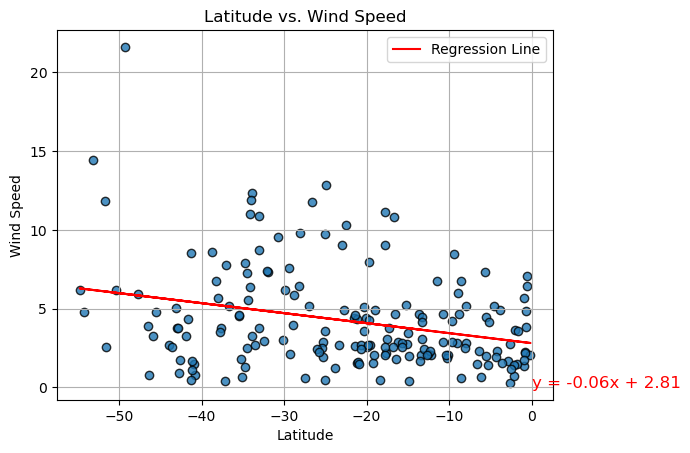

In [22]:
# Southern Hemisphere
linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    title="Wind Speed",
    text_coordinates=(0, 0) )

**Discussion about the linear relationship:** In these last two plots, researching if there is a relationship between wind speed and latitude, we see a very slight increase in speed as we move away from the equator. As well, we see a slight decrease in speed as we move toward the equator. However, the r^2 values here are very low as well, showing a very minor relationship (if any relationship at all) between wind speed and latitude.